In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

In [15]:
# Define the mathematical function to generate ideal y-values
def ideal_function(x):
    return 2 * np.cos(x) / -np.pi + 2 * np.sin(2 * x) / (2 * np.pi) + 2 * np.cos(3 * x) / (-3 * np.pi)

In [16]:
# Generate x-values ranging from -10 to 10 with a step size of 0.2
x_values = np.arange(-10, 10, 0.2)

In [17]:
# Calculate ideal y-values using the defined function
y_values = ideal_function(x_values)

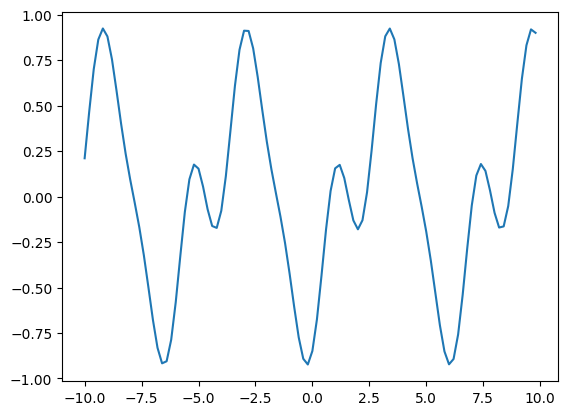

In [18]:
# Generate plots of the ideal data
plt.plot(x_values, y_values)

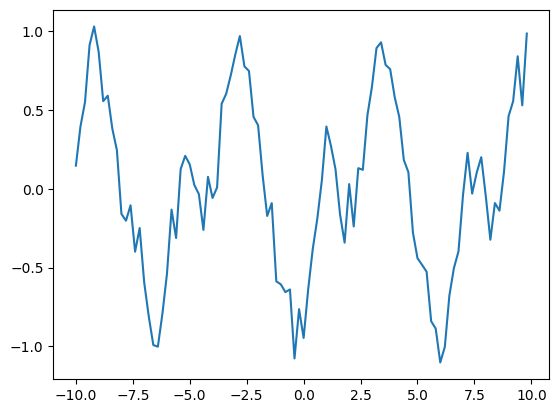

In [22]:
# Add white Gaussian noise to the ideal data
white_normal_noise = np.random.normal(0, 1, 100)
y_noisy1 = y_values + (0.12 * white_normal_noise)

# Generate plots of the noisy data with white noise
plt.plot(x_values, y_noisy1)

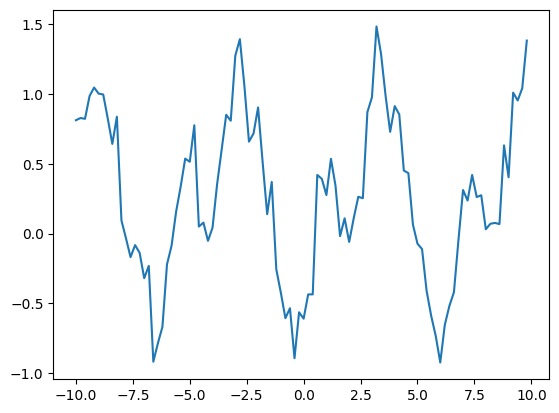

In [23]:
# Add Poisson noise to the ideal data
poisson_noise = np.random.poisson(2, 100)
y_noisy2 = y_values + (0.12 * poisson_noise)

# Generate plots of the noisy data with Poisson noise
plt.plot(x_values, y_noisy2)

In [24]:
# Define polynomial functions for curve fitting up to degree 15
def polynomial(x, *coefficients):
    degree = len(coefficients) - 1
    y = np.zeros_like(x)
    for i in range(degree + 1):
        y += coefficients[i] * (x ** i)
    return y

In [27]:
def fit_polynomial(x, y, degree):
    initial_guess = [0.0] * (degree + 1)  # Initial guess of all zeros
    popt, pcov = curve_fit(polynomial, x, y, p0=initial_guess, maxfev=10000)
    y_pred = polynomial(x, *popt)
    mse = mean_squared_error(y, y_pred)
    return popt, mse

In [31]:
# Fit polynomials and calculate MSE for white noise data
mse_normal = []
for degree in range(1, 16):
    popt, mse = fit_polynomial(x_values, y_noisy1, degree)
    mse_normal.append(mse)

In [29]:
# Fit polynomials and calculate MSE for Poisson noise data
mse_poisson = []
for degree in range(1, 16):
    popt, mse = fit_polynomial(x_values, y_noisy2, degree)
    mse_poisson.append(mse)

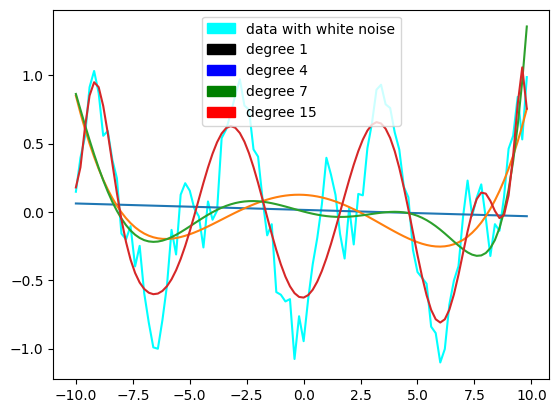

In [34]:
# Plot the noisy data with white noise
plt.plot(x_values, y_noisy1, color='cyan')

# Plot the fitted curves for different polynomial degrees on the white noise data
for degree in [1, 4, 7, 15]:
    popt, _ = fit_polynomial(x_values, y_noisy1, degree)
    plt.plot(x_values, polynomial(x_values, *popt))

# Create legends for the white noise data plot
plt.legend(handles=[
    mpatches.Patch(color='cyan', label='data with white noise'),
    mpatches.Patch(color='black', label='degree 1'),
    mpatches.Patch(color='blue', label='degree 4'),
    mpatches.Patch(color='green', label='degree 7'),
    mpatches.Patch(color='red', label='degree 15')
])

In [35]:
# Calculate MSE for degrees 1, 4, 7, and 15 in the first case (white noise)
degrees = [1, 4, 7, 15]
mse_normal = []

for degree in degrees:
    popt, mse = fit_polynomial(x_values, y_noisy1, degree)
    mse_normal.append(mse)

# Calculate MSE for degrees 1, 4, 7, and 15 in the second case (Poisson noise)
mse_poisson = []

for degree in degrees:
    popt, mse = fit_polynomial(x_values, y_noisy2, degree)
    mse_poisson.append(mse)

# Print the MSE values for degrees 1, 4, 7, and 15 in the first case (white noise)
print("MSE for degrees 1, 4, 7, and 15 in the first case (white noise):")
print(mse_normal)

# Print the MSE values for degrees 1, 4, 7, and 15 in the second case (Poisson noise)
print("MSE for degrees 1, 4, 7, and 15 in the second case (Poisson noise):")
print(mse_poisson)


MSE for degrees 1, 4, 7, and 15 in the first case (white noise):
[0.3027185551811924, 0.2494141071022559, 0.23244639639141432, 0.06621800960357445]
MSE for degrees 1, 4, 7, and 15 in the second case (Poisson noise):
[0.3419342936084543, 0.2779733939376993, 0.252690759285112, 0.08933445864738689]


In [36]:
# Calculate the bias and variance for degrees 1, 4, 7, and 15
degrees = [1, 4, 7, 15]
bias_squared = []
variance = []

for degree in degrees:
    # Perform multiple iterations to estimate bias and variance
    num_iterations = 100
    y_pred = np.zeros((num_iterations, len(x_values)))

    for i in range(num_iterations):
        # Fit the polynomial for each iteration
        popt, _ = fit_polynomial(x_values, y_noisy1, degree)
        y_pred[i] = polynomial(x_values, *popt)

    # Calculate the bias and variance
    y_mean = np.mean(y_pred, axis=0)
    bias_squared.append(np.mean((y_mean - y_values) ** 2))
    variance.append(np.mean((y_pred - y_mean) ** 2))

# Print the bias and variance for degrees 1, 4, 7, and 15
print("Bias squared for degrees 1, 4, 7, and 15:")
print(bias_squared)
print("Variance for degrees 1, 4, 7, and 15:")
print(variance)

Bias squared for degrees 1, 4, 7, and 15:
[0.28835175082161596, 0.2304575739919534, 0.20984166837628457, 0.050796384392844195]
Variance for degrees 1, 4, 7, and 15:
[2.0114077793488047e-33, 1.2901582764116659e-31, 1.479213737269404e-31, 3.520241233887725e-31]
